In [1]:
##Importing necessary libraries 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Data Curation**


In [2]:
dataset = pd.read_csv('/kaggle/input/brain-health/main.csv')

In [3]:
#step 2 -> data understanding
## Data Size (row,column)
## Data Size (storage in memory in  kb )
## Data Type
## Data Columns Information
## Data Describtion
## Null values count 
## outliers count 

In [4]:
#data size
print(dataset.shape)
#the data have 1830 row/ records and 19 columns

(1830, 19)


In [5]:
#data strcture
dataset.head()
#the data set is  relational dataset

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,gender,dementia,dementia_all,diabetes,hypertension,hypercholesterolemia,smoking,EF,PS,Global,Lacunes_Presence,CMB_Presence,Fazekas,fazekas_cat,study_Name,SVD Simple Score,SVD Amended Score,lac_count
0,54,male,no,no,no,No,Yes,Quit,0.620000,0.220000,0.746667,Absent,Absent,1,0 to 1,Geriatric Population Study,NaN,NaN,Zero
1,70,male,no,no,no,Yes,Yes,Quit,NaN,NaN,NaN,Present,Absent,3,2 to 3,Cerebrovascular Study,2.0,5.0,3 to 5
2,58,female,no,no,no,No,Yes,NaN,0.290000,0.050000,0.196667,Absent,Absent,0,0 to 1,Geriatric Population Study,0.0,0.0,Zero
3,58,male,no,no,no,Yes,Yes,Smoker,0.510000,0.210000,0.626667,Absent,Absent,1,0 to 1,ASPS Family Study,0.0,0.0,Zero
4,53,male,no,no,no,No,No,Smoker,-0.327058,0.184665,-0.260674,Absent,Absent,1,0 to 1,Cerebrovascular Study,0.0,1.0,Zero


In [6]:
# Retrieve and display the data types of each column in the dataset.
# This helps to understand the type of data stored in each column
print(dataset.dtypes)

age                       int64
gender                   object
dementia                 object
dementia_all             object
diabetes                 object
hypertension             object
hypercholesterolemia     object
smoking                  object
EF                      float64
PS                      float64
Global                  float64
Lacunes_Presence         object
CMB_Presence             object
Fazekas                   int64
fazekas_cat              object
study_Name               object
SVD Simple Score        float64
SVD Amended Score       float64
lac_count                object
dtype: object


In [7]:
# Retrieve and display the names of all columns in the dataset.
print(dataset.columns)

Index(['age', 'gender', 'dementia', 'dementia_all', 'diabetes', 'hypertension',
       'hypercholesterolemia', 'smoking', 'EF', 'PS', 'Global',
       'Lacunes_Presence', 'CMB_Presence', 'Fazekas', 'fazekas_cat',
       'study_Name', 'SVD Simple Score', 'SVD Amended Score', 'lac_count'],
      dtype='object')


In [8]:
# Generate and display a statistical summary of the numerical columns in the dataset.
# This summary includes metrics such as count (non-null entries), mean, standard deviation,
# minimum, maximum, and the 25th, 50th (median), and 75th percentiles for each numerical column.
dataset.describe()

,age,EF,PS,Global,Fazekas,SVD Simple Score,SVD Amended Score
count,1830.000000,1624.000000,1564.000000,1524.000000,1830.000000,1157.000000,1157.000000
mean,65.972131,-0.062307,-0.064137,-0.025173,1.309836,0.721694,1.490061
std,8.976233,0.787029,0.869516,0.676605,0.798208,0.933046,1.623022
min,39.000000,-5.200000,-2.680000,-2.420000,0.000000,0.000000,0.000000
25%,60.000000,-0.432942,-0.670000,-0.476294,1.000000,0.000000,0.000000
50%,67.000000,0.130000,-0.020000,0.008333,1.000000,0.000000,1.000000
75%,73.000000,0.489273,0.550000,0.426504,2.000000,1.000000,2.000000
max,90.000000,2.350000,2.730000,1.853333,3.000000,3.000000,7.000000


In [9]:
# Display a  summary of the dataset, including the data types of each column,
# the number of non-null entries, and the memory usage. This helps to quickly understand
# the structure and completeness of the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1830 non-null   int64  
 1   gender                1830 non-null   object 
 2   dementia              1796 non-null   object 
 3   dementia_all          1830 non-null   object 
 4   diabetes              1830 non-null   object 
 5   hypertension          1830 non-null   object 
 6   hypercholesterolemia  1830 non-null   object 
 7   smoking               925 non-null    object 
 8   EF                    1624 non-null   float64
 9   PS                    1564 non-null   float64
 10  Global                1524 non-null   float64
 11  Lacunes_Presence      1830 non-null   object 
 12  CMB_Presence          1830 non-null   object 
 13  Fazekas               1830 non-null   int64  
 14  fazekas_cat           1830 non-null   object 
 15  study_Name           

In [10]:
#Discover Null Values 
count_nulls = dataset.isnull().sum()
print(f"null values in the dataset\n---------- \n",  count_nulls)

null values in the dataset
---------- 
 age                       0
gender                    0
dementia                 34
dementia_all              0
diabetes                  0
hypertension              0
hypercholesterolemia      0
smoking                 905
EF                      206
PS                      266
Global                  306
Lacunes_Presence          0
CMB_Presence              0
Fazekas                   0
fazekas_cat               0
study_Name                0
SVD Simple Score        673
SVD Amended Score       673
lac_count                 0
dtype: int64


In [11]:
null_percentage = (dataset.isnull().sum() / dataset.shape[0]) * 100

# Format and print the result for each column
print(null_percentage.round(2))  # .round(2) rounds to 2 decimal places

age                      0.00
gender                   0.00
dementia                 1.86
dementia_all             0.00
diabetes                 0.00
hypertension             0.00
hypercholesterolemia     0.00
smoking                 49.45
EF                      11.26
PS                      14.54
Global                  16.72
Lacunes_Presence         0.00
CMB_Presence             0.00
Fazekas                  0.00
fazekas_cat              0.00
study_Name               0.00
SVD Simple Score        36.78
SVD Amended Score       36.78
lac_count                0.00
dtype: float64


**Discover Outliers**

In [12]:
# Define a function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers as any values outside the lower and upper bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers


In [13]:
def detect_outliers_for_numerical_variabels(dataset, columns): 
    outliers_counts = { }
    for column in columns: 
        outliers_counts[column] = len(detect_outliers(dataset , column))
    return outliers_counts

In [14]:
num_cols = ['age', 'EF', 'PS', 'Global', 'Fazekas', 'SVD Simple Score', 'SVD Amended Score']


In [15]:
outliers_result = detect_outliers_for_numerical_variabels(dataset,num_cols)
outliers_result

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

{'age': 2,
 'EF': 58,
 'PS': 5,
 'Global': 7,
 'Fazekas': 0,
 'SVD Simple Score': 76,
 'SVD Amended Score': 43}

In [16]:
pd.DataFrame.from_dict(outliers_result, orient='index' , columns=["Outliers_Count"])


,Outliers_Count
age,2
EF,58
PS,5
Global,7
Fazekas,0
SVD Simple Score,76
SVD Amended Score,43


In [17]:
#Numerical Data Analysis
def numerical_data_analysis(dataframe, columns):
    """
    This function, numerical_data_analysis, takes a dataframe and a list of columns as input.
    It calculates basic statistical values for each specified column in the dataframe, including:

    - Mean: The average of the values.
    - Median: The middle value when the data is sorted.
    - Min: The smallest value.
    - Max: The largest value.
    - Standard Deviation (std): A measure of how spread out the values are.

    The function returns a dictionary where each column is associated with another dictionary containing
    these calculated values, rounded to two decimal places.
    """
    numerical_analysis_result = {}
    for column in columns:
        numerical_analysis_result[column] = {
            'mean': round(dataframe[column].mean(), 2),
            'median': round(dataframe[column].median(), 2),
            'min': round(dataframe[column].min(), 2),
            'max': round(dataframe[column].max(), 2),
            'std': round(dataframe[column].std(), 2)
        }

    return numerical_analysis_result


In [18]:
dataset.columns

Index(['age', 'gender', 'dementia', 'dementia_all', 'diabetes', 'hypertension',
       'hypercholesterolemia', 'smoking', 'EF', 'PS', 'Global',
       'Lacunes_Presence', 'CMB_Presence', 'Fazekas', 'fazekas_cat',
       'study_Name', 'SVD Simple Score', 'SVD Amended Score', 'lac_count'],
      dtype='object')

In [19]:
numerical_data_analysis_result = numerical_data_analysis(dataset,num_cols)

In [20]:
for column, analysis_result in numerical_data_analysis_result.items():
    print(f"Column: {column}")
    for metric, value in analysis_result.items():
        print(f"{metric}: {value}")
    print()

Column: age
mean: 65.97
median: 67.0
min: 39
max: 90
std: 8.98

Column: EF
mean: -0.06
median: 0.13
min: -5.2
max: 2.35
std: 0.79

Column: PS
mean: -0.06
median: -0.02
min: -2.68
max: 2.73
std: 0.87

Column: Global
mean: -0.03
median: 0.01
min: -2.42
max: 1.85
std: 0.68

Column: Fazekas
mean: 1.31
median: 1.0
min: 0
max: 3
std: 0.8

Column: SVD Simple Score
mean: 0.72
median: 0.0
min: 0.0
max: 3.0
std: 0.93

Column: SVD Amended Score
mean: 1.49
median: 1.0
min: 0.0
max: 7.0
std: 1.62



In [21]:
#Categorical Data Analysis 
def categorical_data_analysis(dataframe, columns):
    """
    Analyzes categorical data in the specified columns of the given dataframe.

    For each column in the provided list, the function calculates the count and percentage of each unique value,
    including missing values (NaN). The results are stored in a dictionary where the keys are the column names,
    and the values are dictionaries containing the count and percentage of each unique value in that column.

    Parameters:
    dataframe (pd.DataFrame): The pandas DataFrame containing the data to be analyzed.
    columns (list): A list of column names to analyze.

    Returns:
    dict: A dictionary where each key is a column name, and the value is another dictionary with the count and
    percentage of each unique value in that column.
    """
    categorical_analysis_result = {}  # Initialize an empty dictionary to store the analysis results
    total_rows = len(dataframe)  # Get the total number of rows in the dataframe

    for column in columns:  # Iterate over the list of specified columns
        value_counts = dataframe[column].value_counts(dropna=False)  # Get the count of each unique value, including NaN
        percentages = (value_counts / total_rows) * 100  # Calculate the percentage for each unique value

        # Combine the count and percentage into a dictionary for each unique value
        categorical_analysis_result[column] = {
            value: {'count': count, 'percentage': round(percent, 2)}  # Round the percentage to two decimal places
            for value, count, percent in zip(value_counts.index, value_counts.values, percentages)
        }

    return categorical_analysis_result  # Return the dictionary containing the results


In [22]:
cate_cols = ['study_Name', 'gender', 'diabetes', 'hypertension',
       'dementia', 'dementia_all', 'hypercholesterolemia', 'smoking']

In [23]:
categorical_data_analysis_result = categorical_data_analysis(dataset,cate_cols)

In [24]:
categorical_data_analysis_result

{'study_Name': {'Geriatric Population Study': {'count': 867,
   'percentage': 47.38},
  'Cerebrovascular Study': {'count': 496, 'percentage': 27.1},
  'ASPS Family Study': {'count': 346, 'percentage': 18.91},
  'Neuroimaging Study': {'count': 121, 'percentage': 6.61}},
 'gender': {'female': {'count': 960, 'percentage': 52.46},
  'male': {'count': 870, 'percentage': 47.54}},
 'diabetes': {'no': {'count': 1606, 'percentage': 87.76},
  'yes': {'count': 224, 'percentage': 12.24}},
 'hypertension': {'Yes': {'count': 1232, 'percentage': 67.32},
  'No': {'count': 598, 'percentage': 32.68}},
 'dementia': {'no': {'count': 1715, 'percentage': 93.72},
  'yes': {'count': 81, 'percentage': 4.43},
  nan: {'count': 34, 'percentage': 1.86}},
 'dementia_all': {'no': {'count': 1715, 'percentage': 93.72},
  'yes': {'count': 115, 'percentage': 6.28}},
 'hypercholesterolemia': {'Yes': {'count': 1333, 'percentage': 72.84},
  'No': {'count': 497, 'percentage': 27.16}},
 'smoking': {nan: {'count': 905, 'perce

In [25]:
# This loop iterates over each column in the 'categorical_data_analysis_result' dictionary.
# For each column, it retrieves the associated categories (unique values) and their counts and percentages.

for column, categories in categorical_data_analysis_result.items():
    """
    This loop iterates over each column in the 'categorical_data_analysis_result' dictionary.
    For each column, it retrieves the associated categories (unique values) and their counts and percentages.

    Parameters:
    categorical_data_analysis_result (dict): A dictionary containing the results of the categorical data analysis.
                                              The keys are column names, and the values are dictionaries containing
                                              the count and percentage for each unique value in that column.

    Process:
    - The loop first iterates over each column (variable) in the result.
    - For each category within a column, it checks if the category is `None`. If so, it will display it as 'NaN'.
    - The count and percentage of each category are printed out for the user to review.
    """
    print(f"\nVariable: {column}")  # Print the column name (variable)

    # Loop through each category and its values (count and percentage)
    for category, values in categories.items():
        category_name = category if category is not None else 'NaN'  # Handle 'None' as 'NaN' for better readability
        count = values['count']  # Get the count for the category
        percentage = values['percentage']  # Get the percentage for the category

        # Print the category details: name, count, and percentage
        print(f"  Category: {category_name}, Count: {count}, Percentage: {percentage}%")



Variable: study_Name
  Category: Geriatric Population Study, Count: 867, Percentage: 47.38%
  Category: Cerebrovascular Study, Count: 496, Percentage: 27.1%
  Category: ASPS Family Study, Count: 346, Percentage: 18.91%
  Category: Neuroimaging Study, Count: 121, Percentage: 6.61%

Variable: gender
  Category: female, Count: 960, Percentage: 52.46%
  Category: male, Count: 870, Percentage: 47.54%

Variable: diabetes
  Category: no, Count: 1606, Percentage: 87.76%
  Category: yes, Count: 224, Percentage: 12.24%

Variable: hypertension
  Category: Yes, Count: 1232, Percentage: 67.32%
  Category: No, Count: 598, Percentage: 32.68%

Variable: dementia
  Category: no, Count: 1715, Percentage: 93.72%
  Category: yes, Count: 81, Percentage: 4.43%
  Category: nan, Count: 34, Percentage: 1.86%

Variable: dementia_all
  Category: no, Count: 1715, Percentage: 93.72%
  Category: yes, Count: 115, Percentage: 6.28%

Variable: hypercholesterolemia
  Category: Yes, Count: 1333, Percentage: 72.84%
  Ca

In [26]:
rows =[]
for column, categories in categorical_data_analysis_result.items():
    for category, values in categories.items():
        # Append each row as a dictionary
        rows.append({
            'variable': column,
            'category': category if category is not None else 'NaN',
            'count': values['count'],
            'percentage': values['percentage']
        })

In [27]:
df = pd.DataFrame(rows)
df

,variable,category,count,percentage
0,study_Name,Geriatric Population Study,867,47.38
1,study_Name,Cerebrovascular Study,496,27.10
2,study_Name,ASPS Family Study,346,18.91
3,study_Name,Neuroimaging Study,121,6.61
4,gender,female,960,52.46
5,gender,male,870,47.54
6,diabetes,no,1606,87.76
7,diabetes,yes,224,12.24
8,hypertension,Yes,1232,67.32
9,hypertension,No,598,32.68


In [28]:
def kde_and_box_plot(df, column):
    # Calculate mean and median for the KDE plot
    mean_value = df[column].mean()
    median_value = df[column].median()

    # Create a figure with 2 subplots (KDE on the left, Box plot on the right)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

    # KDE plot with the area under the curve filled and vertical lines for mean/median
    sns.kdeplot(x=df[column], ax=axes[0], fill=True, color="skyblue", alpha=0.4)
    axes[0].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    axes[0].legend()
    axes[0].set_title(f'KDE Plot - {column}')

    # Box plot on the right
    sns.boxplot(x=df[column], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Box Plot - {column}')

    # Adjust layout
    plt.tight_layout()

    # Display the figure
    return fig,mean_value,median_value 
   
 


In [29]:
def box_plot(df, column):
    # Create a box plot
    print(f"#### Box Plot - {column}")

    # Display the box plot for a numerical column
    fig, ax = plt.subplots()
    sns.boxplot(x=df[column], ax=ax)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the column name
    print(f"### {column}: ")

In [30]:
def kde_plot(df, column):
    print(f"#### KDE Plot - {column}")

    # Calculate mean and median
    mean_value = df[column].mean()
    median_value = df[column].median()

    # Create the KDE plot with filled area
    fig, ax = plt.subplots()
    sns.kdeplot(x=df[column], ax=ax, fill=True, color="skyblue", alpha=0.4)

    # Add vertical lines for mean and median
    ax.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')

    # Add legend
    ax.legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Display the mean and median values below the plot
    print(f"### Mean of {column}: {mean_value:.2f}")
    print(f"### Median of {column}: {median_value:.2f}")


In [31]:
def show_kde_and_box_plot(dataset, col, b_a):
    # Assuming kde_and_box_plot returns (fig, mean, median)
    fig, col_mean, col_median = kde_and_box_plot(dataset, col)
    
    # Save the figure based on the condition
    if b_a == 'b':
        fig.savefig(f"{col}_dist_before_cleaning.png")
    else:
        fig.savefig(f"{col}_dist_after_cleaning.png")
    
    plt.show()
    
    # Print the mean and median
    print(f"Mean of {col}: {col_mean:.2f}")
    print(f"Median of {col}: {col_median:.2f}")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


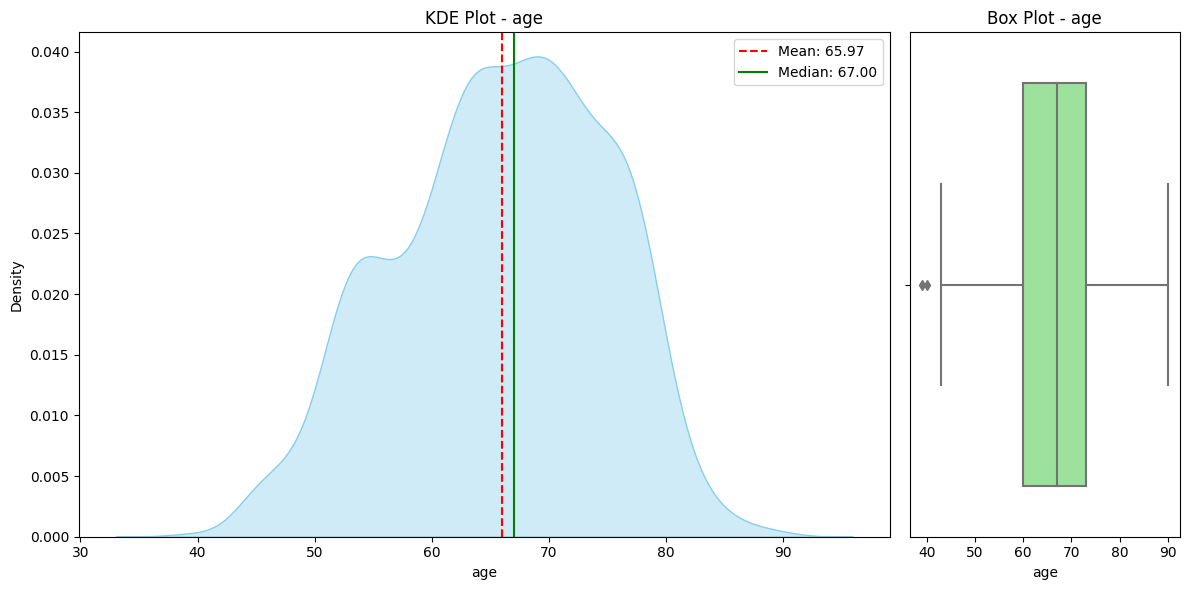

Mean of age: 65.97
Median of age: 67.00


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


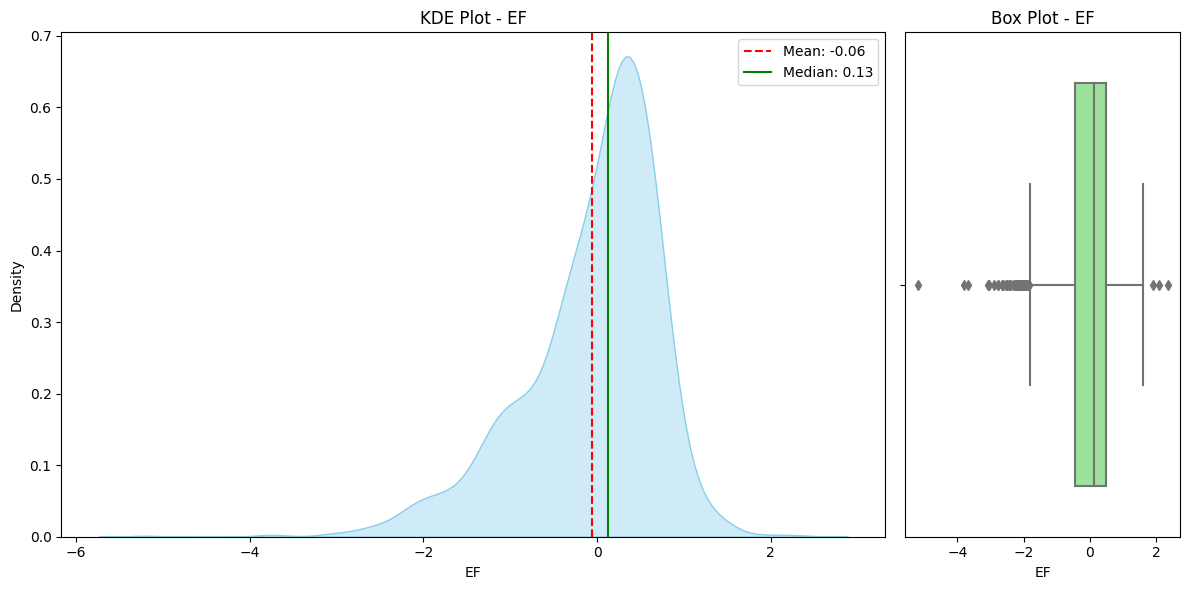

Mean of EF: -0.06
Median of EF: 0.13


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


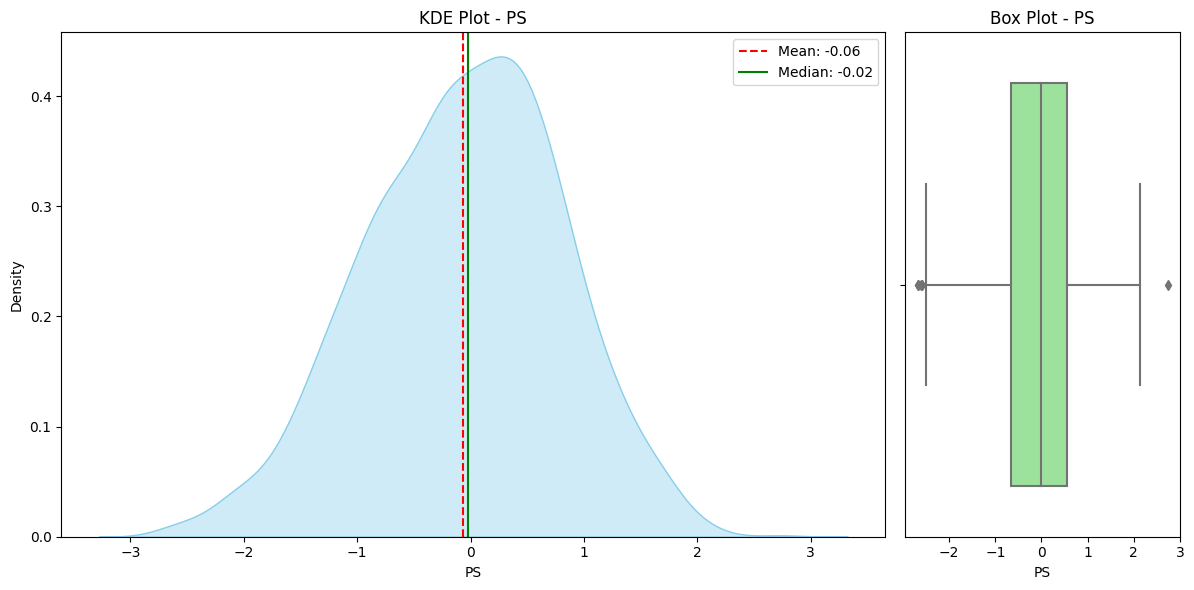

Mean of PS: -0.06
Median of PS: -0.02


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


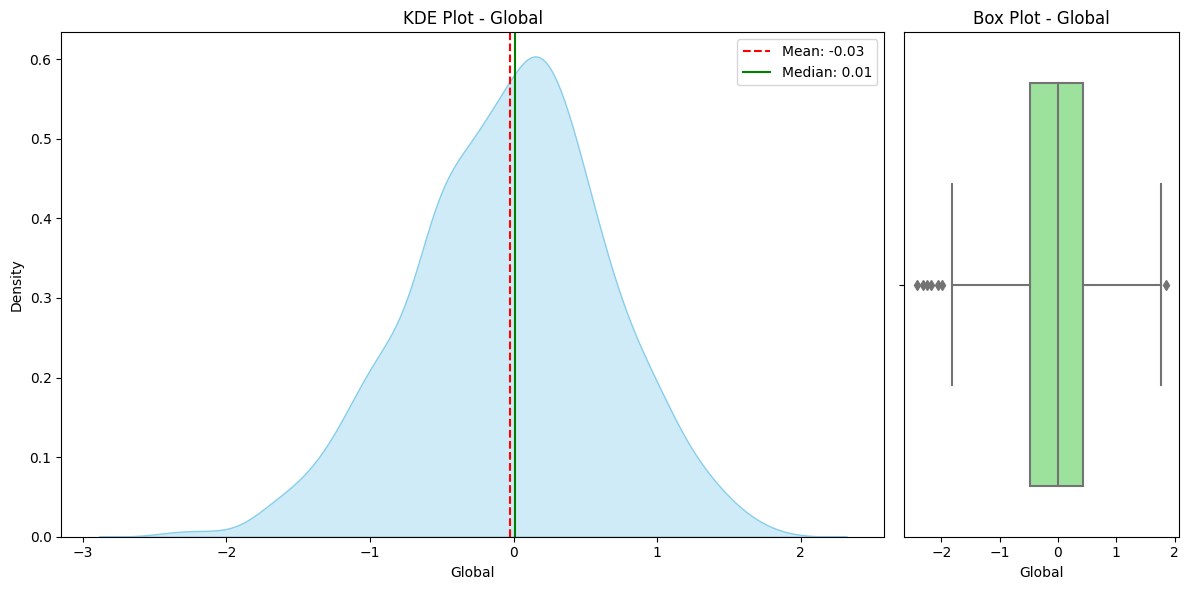

Mean of Global: -0.03
Median of Global: 0.01


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


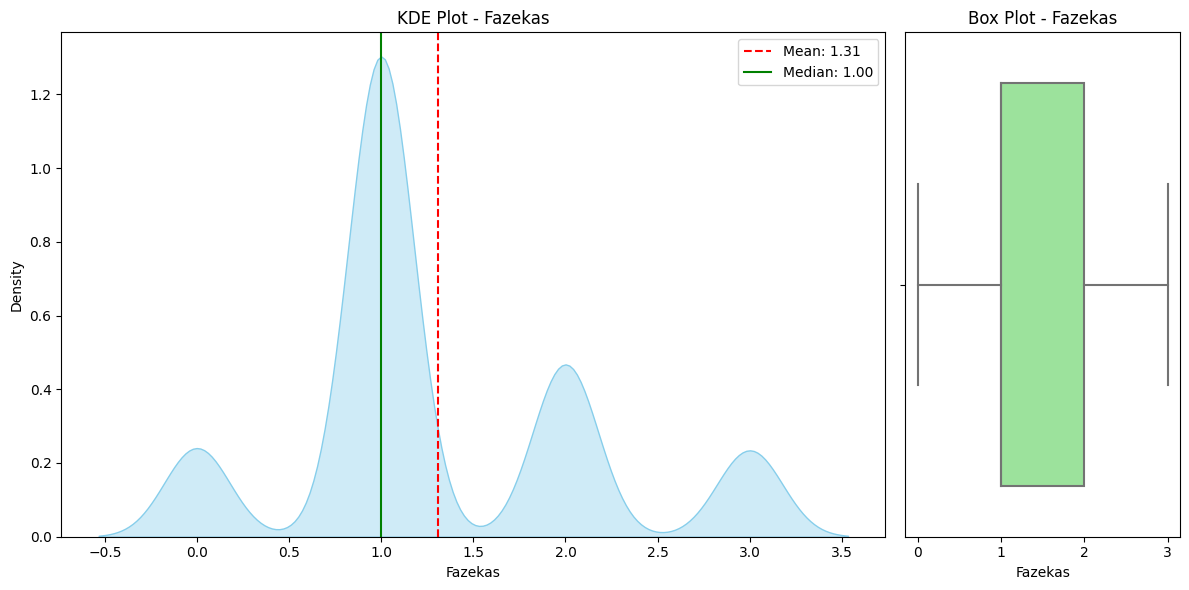

Mean of Fazekas: 1.31
Median of Fazekas: 1.00


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


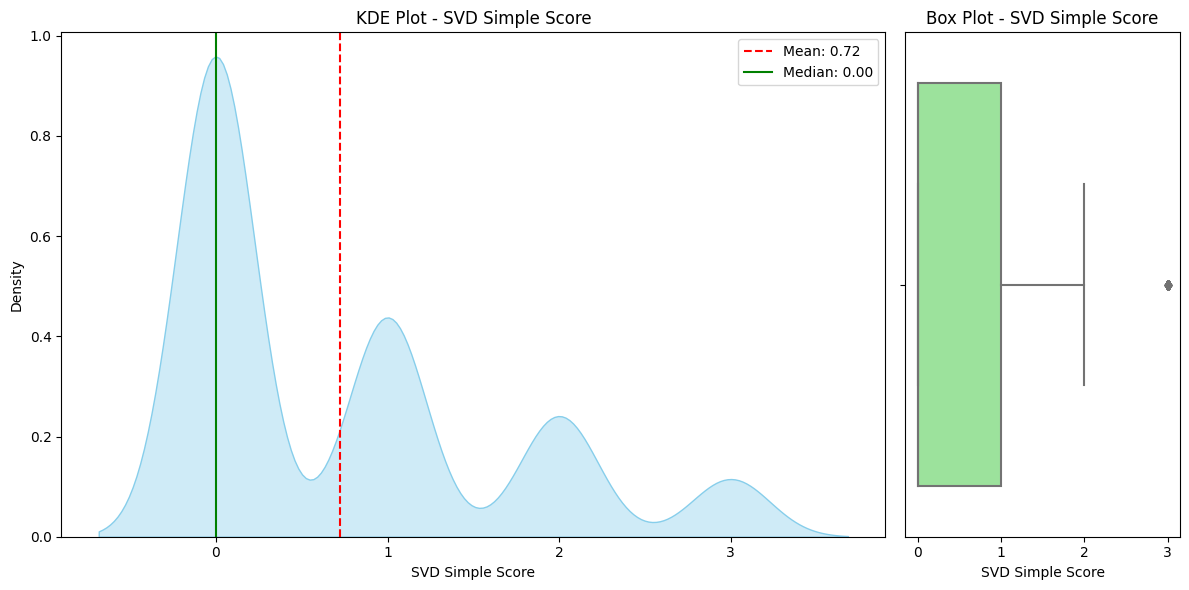

Mean of SVD Simple Score: 0.72
Median of SVD Simple Score: 0.00


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


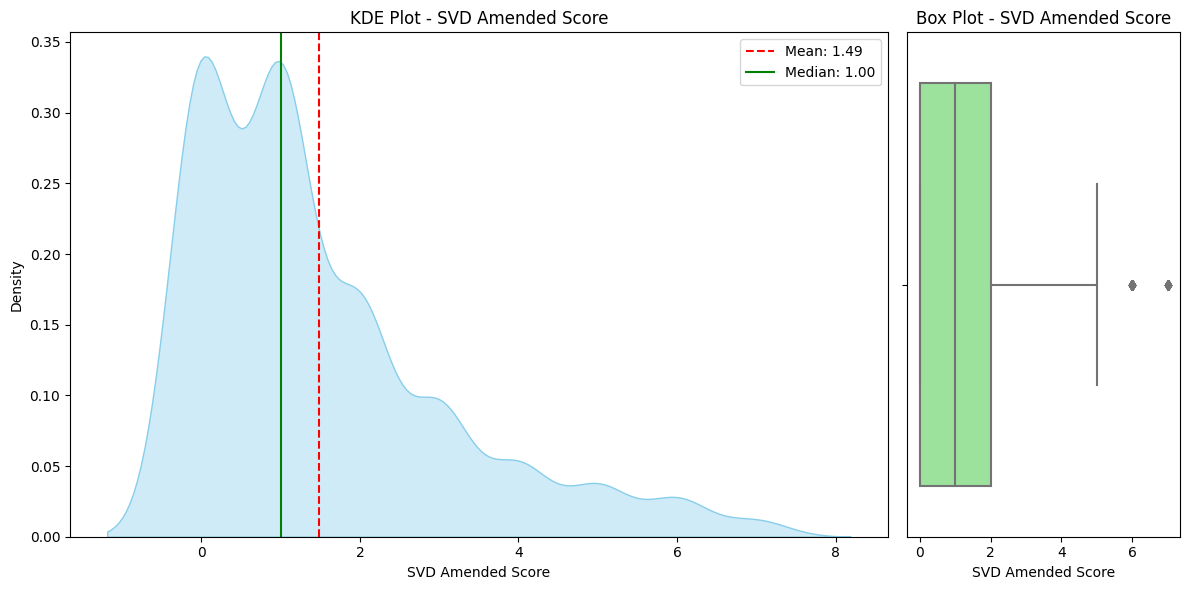

Mean of SVD Amended Score: 1.49
Median of SVD Amended Score: 1.00


In [32]:
for numerical in num_cols:
    show_kde_and_box_plot(dataset,numerical,'b')
    

In [33]:

def categorical_visualization(chart_type, column_name, dataset):
    """
    This function generates a visualization (pie chart using Matplotlib or bar chart using Seaborn) 
    for the specified column in the dataset.

    Parameters:
    chart_type (str): The type of chart to generate (PIE or BAR).
    column_name (str): The name of the column in the dataset to visualize.
    dataset (DataFrame): The dataset containing the column to visualize.
    colors (list or str): Optional color(s) to apply to the chart.

    Returns:
    fig: The generated figure for the visualization.
    """
    
    fig, ax = plt.subplots(figsize=(8,4))  # Create a figure and axis with a specified size
    
    if chart_type.upper() == "PIE":
        # Pie chart using Matplotlib
        data = dataset[column_name].value_counts()
        ax.pie(data, labels=data.index, autopct='%1.1f%%', colors='#1E3E62')
        ax.set_title(f"{column_name} Distribution")
        ax.legend(title=column_name, loc='lower right')
        
    elif chart_type.upper() == "BAR":
        # Bar chart using Seaborn
        sns.countplot(x=column_name, data=dataset, ax=ax, color='#FAC213')
        ax.set_title(f"{column_name} Distribution")
        ax.set_xlabel(column_name)
        ax.set_ylabel("Count")
        ax.legend(title=column_name, loc='upper right')
    else:
        print("Invalid chart type")
        return None

    return fig  # Return the figure


In [34]:
def show_bar_chart(col, b_a):
    fig = categorical_visualization('bar',col,dataset)
    if b_a == 'b':
        fig.savefig(f"{col}_dist_before_cleaning.png")
    else:
        fig.savefig(f"{col}_dist_after_cleaning.png")
    plt.show()


        

In [35]:
cate_cols = [ 'gender', 'dementia', 'dementia_all', 'diabetes', 'hypertension',
       'hypercholesterolemia', 'smoking', 
       'Lacunes_Presence', 'CMB_Presence',  'fazekas_cat',
       'study_Name',  'lac_count'] 

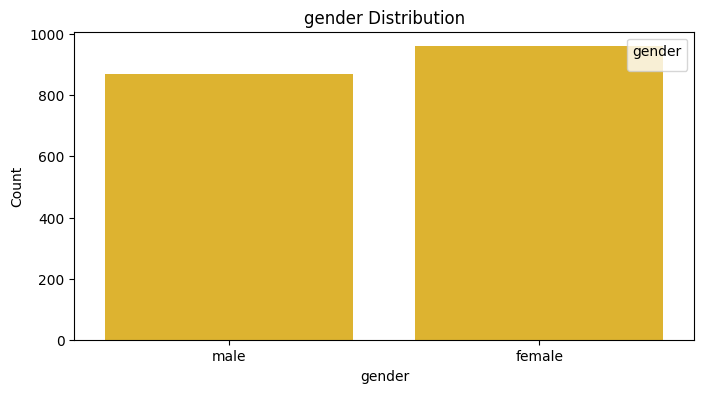

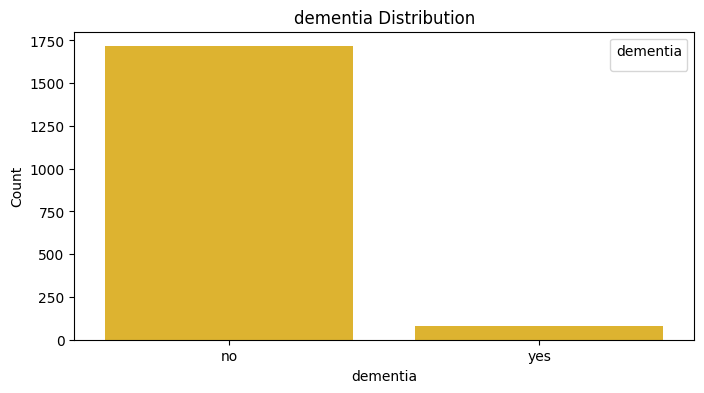

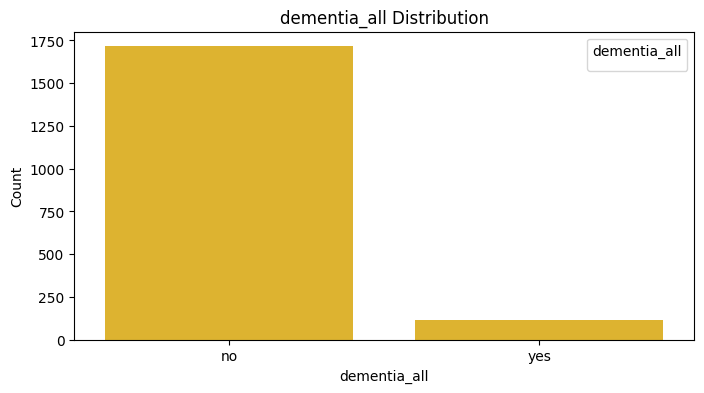

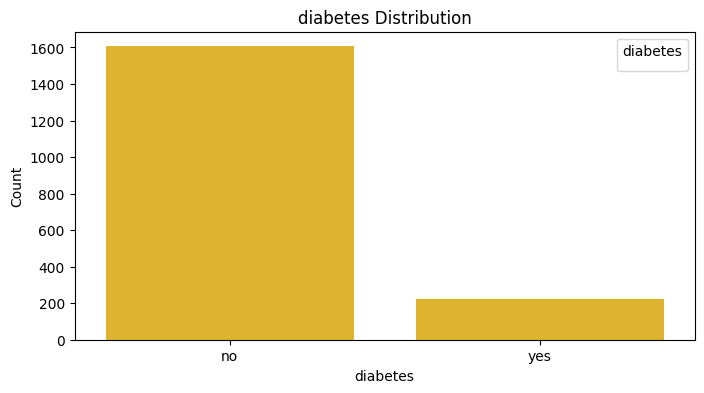

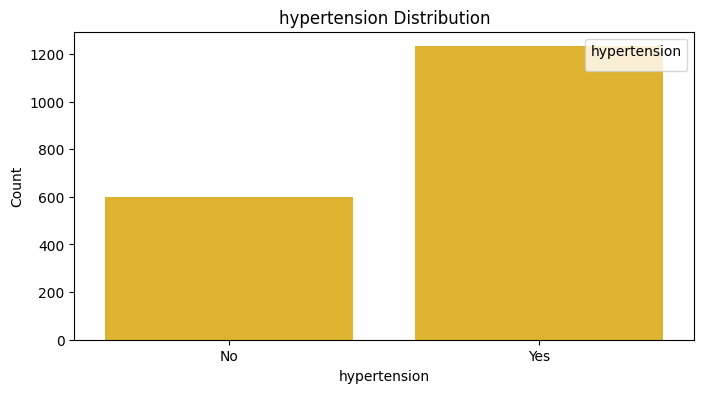

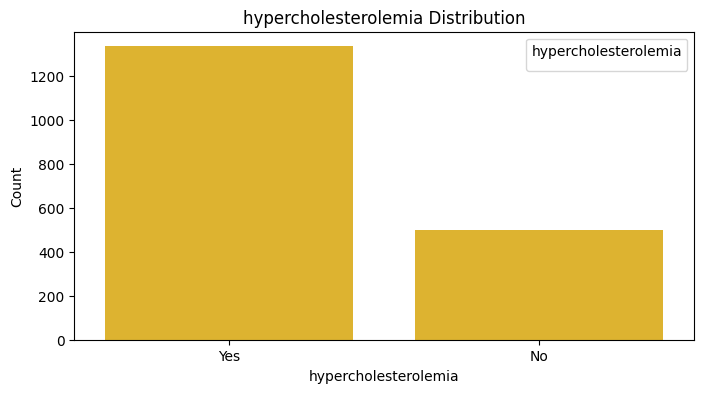

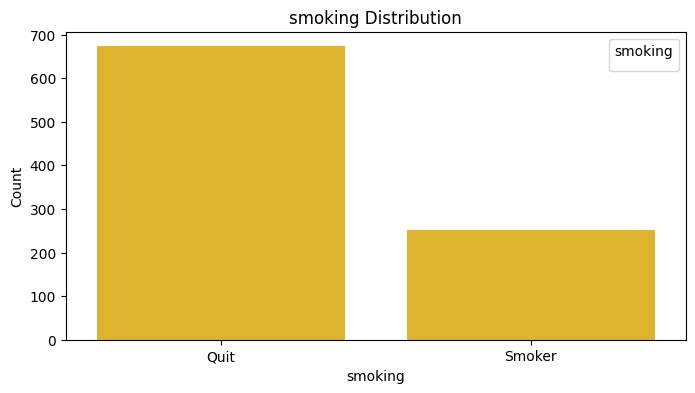

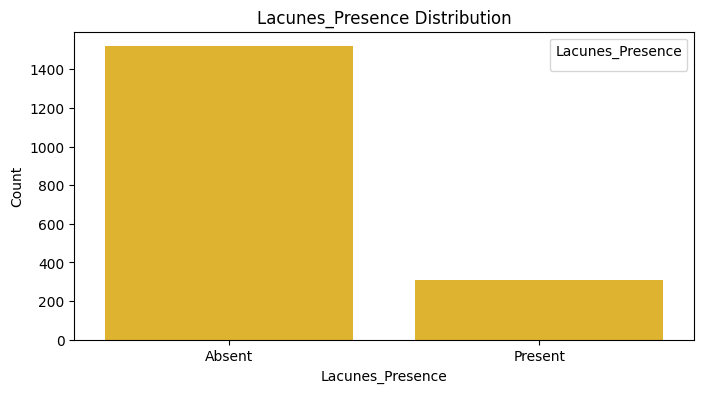

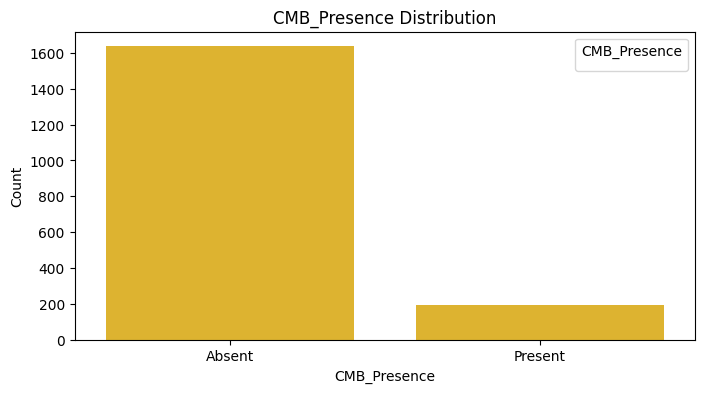

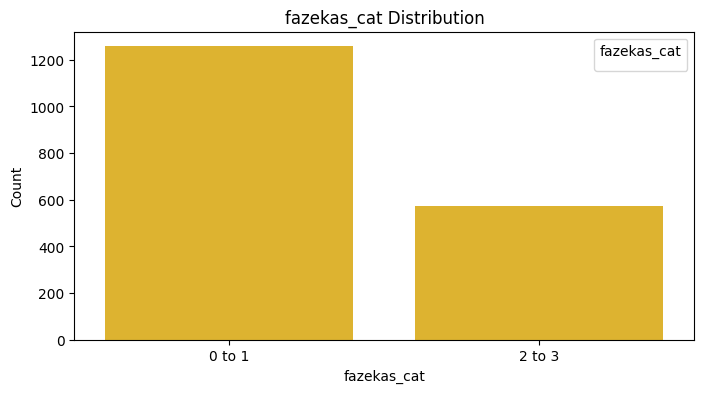

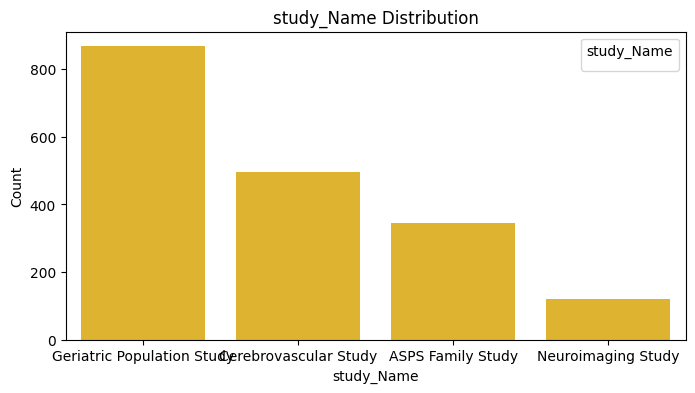

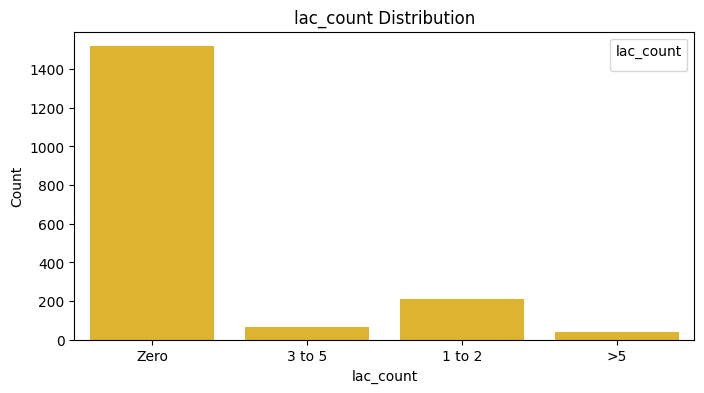

In [36]:
for cate in cate_cols: 
    show_bar_chart(cate,'b')

# 3. Data Wrangling
1. Impute Null Values
2. Drop Columns
3. rename columns 
4.  Create new Features


In [37]:
null_values = dataset.isnull().sum()

In [38]:
null_values

age                       0
gender                    0
dementia                 34
dementia_all              0
diabetes                  0
hypertension              0
hypercholesterolemia      0
smoking                 905
EF                      206
PS                      266
Global                  306
Lacunes_Presence          0
CMB_Presence              0
Fazekas                   0
fazekas_cat               0
study_Name                0
SVD Simple Score        673
SVD Amended Score       673
lac_count                 0
dtype: int64

## Remove Nulls Values


In [39]:
def remove_numerical_null_values(columns):
    for column in columns: 
        dataset[column].fillna(dataset[column].mean(), inplace= True)

def remove_categorical_null_values(columns):
    for column in columns:
        dataset[column].fillna(dataset[column].mode()[0],inplace=True )

In [40]:
numerical_NULLS_variables = dataset[['EF','PS','Global','SVD Simple Score', 'SVD Amended Score']]
categorical_NULLS_variables = dataset[['dementia', 'smoking']]

In [41]:
remove_numerical_null_values(numerical_NULLS_variables)
remove_categorical_null_values(categorical_NULLS_variables)

<ipython-input-39-2db630dc7dfd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].mean(), inplace= True)
<ipython-input-39-2db630dc7dfd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [42]:
null_values = dataset.isnull().sum() 

In [43]:
null_values

age                     0
gender                  0
dementia                0
dementia_all            0
diabetes                0
hypertension            0
hypercholesterolemia    0
smoking                 0
EF                      0
PS                      0
Global                  0
Lacunes_Presence        0
CMB_Presence            0
Fazekas                 0
fazekas_cat             0
study_Name              0
SVD Simple Score        0
SVD Amended Score       0
lac_count               0
dtype: int64

In [44]:
dataset.drop(columns=['dementia' , 'study_Name' , 'EF',  'SVD Simple Score' ] , inplace = True )

In [45]:
dataset.columns

Index(['age', 'gender', 'dementia_all', 'diabetes', 'hypertension',
       'hypercholesterolemia', 'smoking', 'PS', 'Global', 'Lacunes_Presence',
       'CMB_Presence', 'Fazekas', 'fazekas_cat', 'SVD Amended Score',
       'lac_count'],
      dtype='object')

In [46]:
#rename columns
dataset.rename(columns={"age": "Age", "gender": "Gender", "dementia_all" : "Dementia", "diabetes":"Diabetes",
                   "hypertension":"Hypertension", "hypercholesterolemia":"Hypercholesterolemia",
                   "smoking": "Smoking",'PS':'Processing Speed',
                   "Lacunes_Presence":"Lacunes Presence", "CMB_Presence":"CMB Presence", 
                   "fazekas_cat":"Fazekas Category", "lac_count":"Lacunes Count"}, inplace=True)


## Detect and handle outliers 


### 1. **Detecting Outliers (Using IQR Method)**

#### This function identifies the outliers by calculating the interquartile range (IQR) and defining the lower and upper bounds. Any value outside of these bounds is considered an outlier.

In [47]:
# Define a function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers as any values outside the lower and upper bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers


In [48]:
detect_outliers(dataset,'Age')

,Age,Gender,Dementia,Diabetes,Hypertension,Hypercholesterolemia,Smoking,Processing Speed,Global,Lacunes Presence,CMB Presence,Fazekas,Fazekas Category,SVD Amended Score,Lacunes Count
85,39,female,no,no,Yes,No,Quit,1.45,0.726667,Absent,Absent,1,0 to 1,0.0,Zero
716,40,female,no,no,No,No,Quit,0.93,1.313333,Absent,Absent,0,0 to 1,0.0,Zero


In [49]:
def show_outliers(df,columns):
    outliers_result = detect_outliers_for_numerical_variabels(df, columns)
    outliers_result = pd.DataFrame.from_dict(outliers_result, orient='index', columns=["Outliers_Count"])
    return outliers_result

In [50]:
show_outliers(dataset, ['Age','Processing Speed','Global', 'Fazekas', 'SVD Amended Score' ])

,Outliers_Count
Age,2
Processing Speed,33
Global,60
Fazekas,0
SVD Amended Score,614


In [51]:
dataset.columns

Index(['Age', 'Gender', 'Dementia', 'Diabetes', 'Hypertension',
       'Hypercholesterolemia', 'Smoking', 'Processing Speed', 'Global',
       'Lacunes Presence', 'CMB Presence', 'Fazekas', 'Fazekas Category',
       'SVD Amended Score', 'Lacunes Count'],
      dtype='object')

In [52]:
def show_bar_plot(df, columns):
    # If a single column is passed as a string, convert it to a list
    if isinstance(columns, str):
        columns = [columns]

    num_columns = len(columns)

    # Limit number of columns per row for user-friendly layout
    columns_per_row = 2  # Adjust this number for more/less plots per row
    num_rows = (num_columns + columns_per_row - 1) // columns_per_row  # Calculate required rows

    # Create a figure with only the necessary number of subplots
    fig, axes = plt.subplots(num_rows, min(columns_per_row, num_columns),
                             figsize=(5 * min(columns_per_row, num_columns), 5 * num_rows))

    # Flatten the axes array for easy iteration if multiple rows are present
    if num_columns == 1:
        axes = [axes]  # Convert axes to list to keep consistent with iteration
    else:
        axes = axes.flatten() if num_rows > 1 else [axes]

    # Iterate through the columns and plot bar plots
    for i, col in enumerate(columns):
        # Handle nulls by converting them to a separate category
        data = df[col].fillna('Null')

        # Check if the column is numeric or categorical
        if pd.api.types.is_numeric_dtype(data):
            # Bar plot for numeric data
            sns.barplot(x=data.index, y=data.values, ax=axes[i], color='#1f77b4')
            axes[i].set_xlabel('Index')
            axes[i].set_ylabel(col)
        else:
            # Count plot for categorical data (including 'Null' values as a category)
            sns.countplot(x=data, ax=axes[i], palette='muted')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')

        # Set title for each subplot
        axes[i].set_title(col)

    # If any axes were created beyond the actual number of columns, delete them
    if num_columns < len(axes):
        for j in range(num_columns, len(axes)):
            fig.delaxes(axes[j])

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    # Display the figure
    plt.show()

    # Return the figure object for further use
    return fig

# Example usage:
# fig = show_bar_plot(dataset, ['CategoryColumn1', 'CategoryColumn2']

In [53]:
# Function to visualize KDE plots for one or multiple numerical columns
def show_kde_plot(df, columns):
    # If a single column is passed as a string, convert it to a list
    if isinstance(columns, str):
        columns = [columns]

    num_columns = len(columns)

    # Limit number of columns per row for user-friendly layout
    columns_per_row = 2  # Adjust this number for more/less plots per row
    num_rows = (num_columns + columns_per_row - 1) // columns_per_row  # Calculate required rows

    # Create a figure with subplots (adjust rows and columns)
    fig, axes = plt.subplots(num_rows, min(columns_per_row, num_columns),
                             figsize=(5 * min(columns_per_row, num_columns), 5 * num_rows))

    # Flatten the axes array for easy iteration if multiple rows are present
    axes = axes.flatten() if num_rows > 1 else [axes]

    # Iterate through the columns and plot KDE plots
    for i, col in enumerate(columns):
        sns.kdeplot(df[col], ax=axes[i], color='orange', fill=True, alpha=0.6)  # KDE plot with fill
        mean_val = df[col].mean()
        median_val = df[col].median()

        # Add vertical lines for mean and median
        axes[i].axvline(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='red', linestyle='-', label=f'Median: {median_val:.2f}')
        
        axes[i].legend()  # Show the legend
        axes[i].set_title(col)  # Set title for each subplot

    # Remove any empty subplots (if num_columns < columns_per_row * num_rows)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    # Display the figure
    return fig 

# Example usage: 
# show_kde_plot(dataset, ['Age', 'Global', 'Fazekas', 'SVD Amended Score'])


In [54]:

# Function to visualize box plots for one or multiple numerical columns
def show_box_plot(df, columns):
    # If a single column is passed as a string, convert it to a list
    if isinstance(columns, str):
        columns = [columns]

    num_columns = len(columns)

    # Limit number of columns per row for user-friendly layout
    columns_per_row = 2  # You can adjust this number for more/less plots per row
    num_rows = (num_columns + columns_per_row - 1) // columns_per_row  # Calculate required rows

    # Create a figure with subplots (adjust rows and columns)
    fig, axes = plt.subplots(num_rows, min(columns_per_row, num_columns),
                             figsize=(5 * min(columns_per_row, num_columns), 5 * num_rows))

    # Flatten the axes array for easy iteration if multiple rows are present
    axes = axes.flatten() if num_rows > 1 else [axes]

    # Iterate through the columns and plot boxplots
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i], color='#003366')  # Boxplot with Seaborn
        axes[i].set_title(col)  # Set title for each subplot

    # Remove any empty subplots (if num_columns < columns_per_row * num_rows)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    # Return the figure object
    return fig


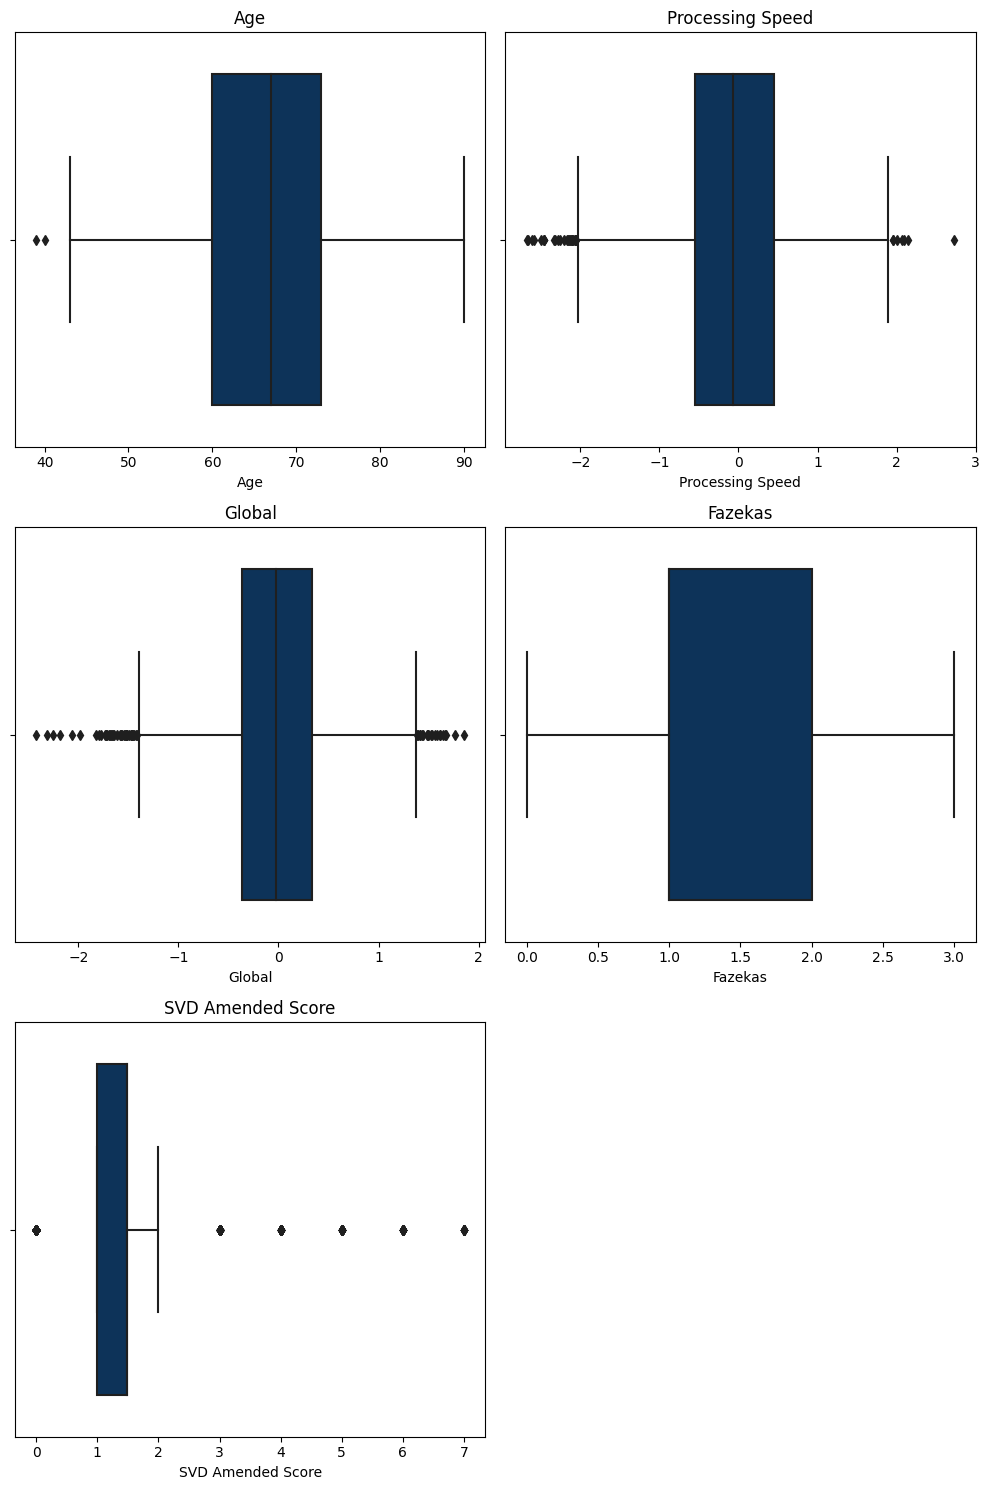

In [55]:
# Call the function and save the figure
fig = show_box_plot(dataset, ['Age','Processing Speed', 'Global', 'Fazekas', 'SVD Amended Score'])

# Now you can save the figure or do other operations
fig.savefig('box_plot_outliers.png')
plt.show()  # To display the figure if needed

**Handling Outliers (Dropping Method)**

#### This function **removes the rows** with outliers based on the calculated bounds from the IQR method.

In [56]:

# Capping outliers in the 'age' column
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where the column value is below the lower bound or above the upper bound
    dataset = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return dataset

In [57]:
for column in ['Age','Processing Speed','Global' , 'Fazekas', 'SVD Amended Score']: 
    cap_outliers(dataset,column)

In [58]:
show_outliers(dataset,['Age','Processing Speed','Global', 'Fazekas', 'SVD Amended Score'])

,Outliers_Count
Age,0
Processing Speed,0
Global,0
Fazekas,0
SVD Amended Score,0


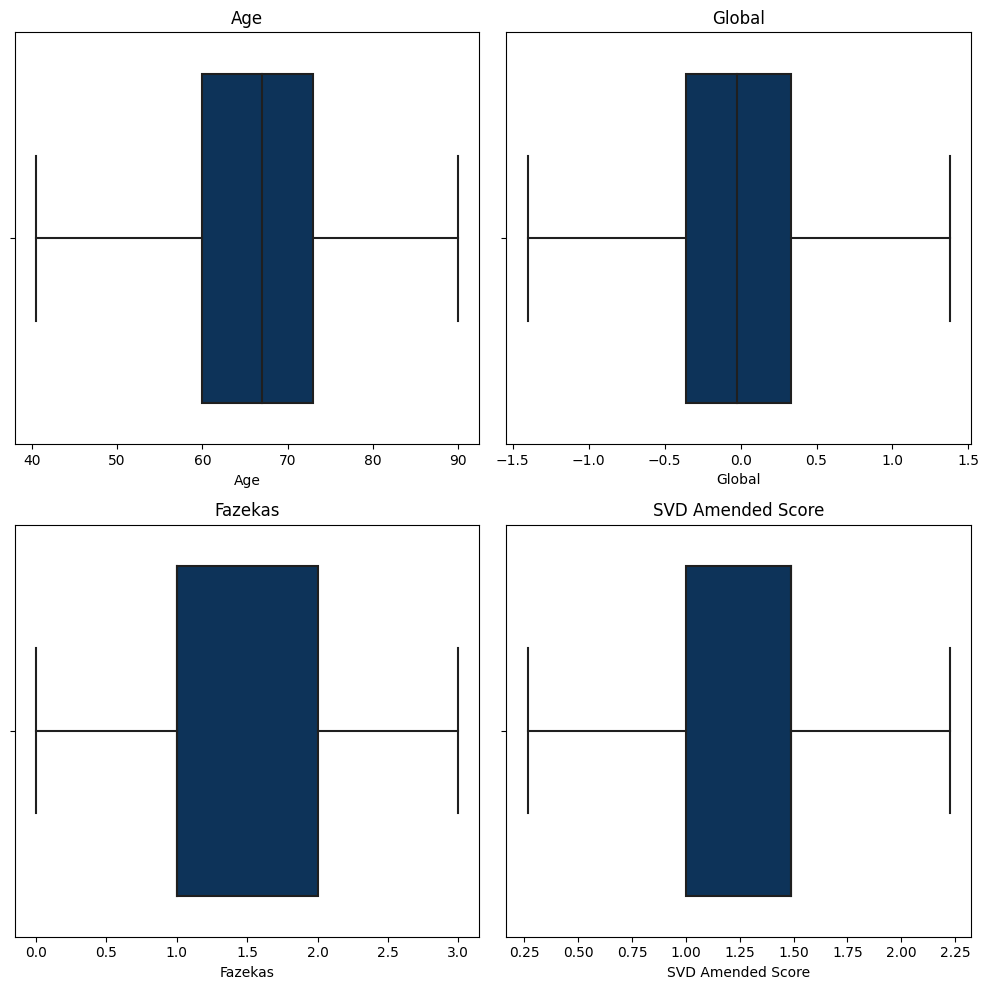

In [59]:
fig = show_box_plot(dataset, ['Age','Global', 'Fazekas', 'SVD Amended Score'])
fig.savefig("box_plot_without_outliers.png")
plt.show()

## Create New Variables 
**Step: Creating New Categorical Variables for Small Vessel Disease (SVD) Scores**

In this step,  new variable are created based on the existing score  of **'SVD Amended Score'** to categorize the severity of small vessel disease (SVD) based on predefined thresholds.

**SVD Score Label**: This new variable categorizes the 'SVD Amended Score' into broader descriptive categories, with a slight difference in the categorization logic.


In [60]:
dataset['SVD Score Label'] = None  # Initialize the new column
 
for index, row in dataset.iterrows():
    score = dataset.loc[index, 'SVD Amended Score']
    if 0 <= score < 1:
        dataset.loc[index, 'SVD Score Label'] = "No small vessel disease"
    elif 1 <= score < 2:
        dataset.loc[index, 'SVD Score Label'] = "Mild small vessel disease"
    elif score >= 2:
        dataset.loc[index, 'SVD Score Label'] = "Significant small vessel disease"
 

In [61]:
dataset.head()

,Age,Gender,Dementia,Diabetes,Hypertension,Hypercholesterolemia,Smoking,Processing Speed,Global,Lacunes Presence,CMB Presence,Fazekas,Fazekas Category,SVD Amended Score,Lacunes Count,SVD Score Label
0,54.0,male,no,no,No,Yes,Quit,0.220000,0.746667,Absent,Absent,1,0 to 1,1.490061,Zero,Mild small vessel disease
1,70.0,male,no,no,Yes,Yes,Quit,-0.064137,-0.025173,Present,Absent,3,2 to 3,2.225151,3 to 5,Significant small vessel disease
2,58.0,female,no,no,No,Yes,Quit,0.050000,0.196667,Absent,Absent,0,0 to 1,0.264909,Zero,No small vessel disease
3,58.0,male,no,no,Yes,Yes,Smoker,0.210000,0.626667,Absent,Absent,1,0 to 1,0.264909,Zero,No small vessel disease
4,53.0,male,no,no,No,No,Smoker,0.184665,-0.260674,Absent,Absent,1,0 to 1,1.000000,Zero,Mild small vessel disease


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1830 non-null   float64
 1   Gender                1830 non-null   object 
 2   Dementia              1830 non-null   object 
 3   Diabetes              1830 non-null   object 
 4   Hypertension          1830 non-null   object 
 5   Hypercholesterolemia  1830 non-null   object 
 6   Smoking               1830 non-null   object 
 7   Processing Speed      1830 non-null   float64
 8   Global                1830 non-null   float64
 9   Lacunes Presence      1830 non-null   object 
 10  CMB Presence          1830 non-null   object 
 11  Fazekas               1830 non-null   int64  
 12  Fazekas Category      1830 non-null   object 
 13  SVD Amended Score     1830 non-null   float64
 14  Lacunes Count         1830 non-null   object 
 15  SVD Score Label      

In [63]:
dataset.describe() 

,Age,Processing Speed,Global,Fazekas,SVD Amended Score
count,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000
mean,65.973224,-0.061424,-0.021114,1.309836,1.290100
std,8.973053,0.792260,0.596444,0.798208,0.640748
min,40.500000,-2.033102,-1.402797,0.000000,0.264909
25%,60.000000,-0.543241,-0.360000,1.000000,1.000000
50%,67.000000,-0.064137,-0.025173,1.000000,1.490061
75%,73.000000,0.450000,0.335198,2.000000,1.490061
max,90.000000,1.939861,1.377996,3.000000,2.225151


In [64]:
num_cols = ['Age', 'Processing Speed','Global','Fazekas','SVD Amended Score']
cate_cols =['Gender', 'Dementia', 'Diabetes','Hypertension','Hypercholesterolemia',
           'Smoking','Lacunes Presence','CMB Presence' , 'Fazekas Category','Lacunes Presence'
           'SVD Score Label']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


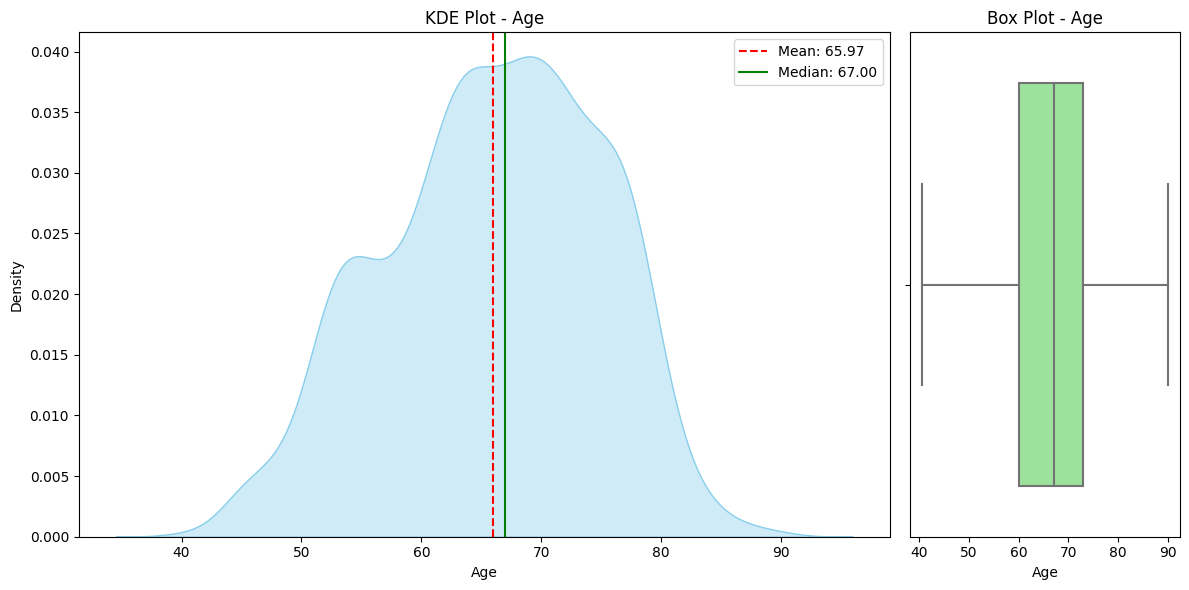

Mean of Age: 65.97
Median of Age: 67.00


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


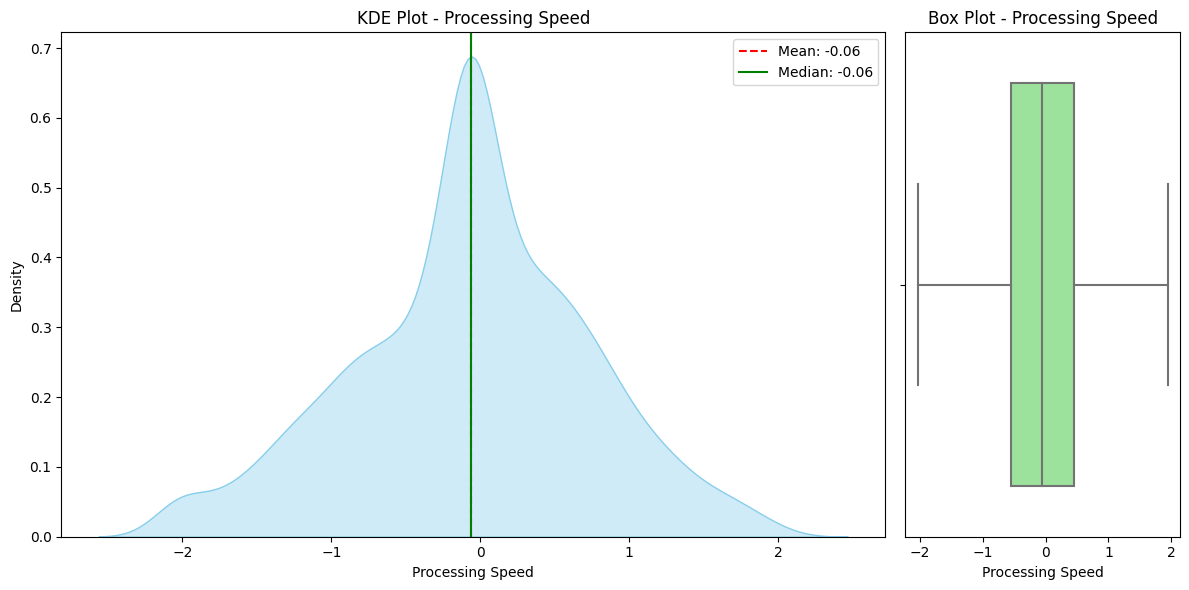

Mean of Processing Speed: -0.06
Median of Processing Speed: -0.06


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


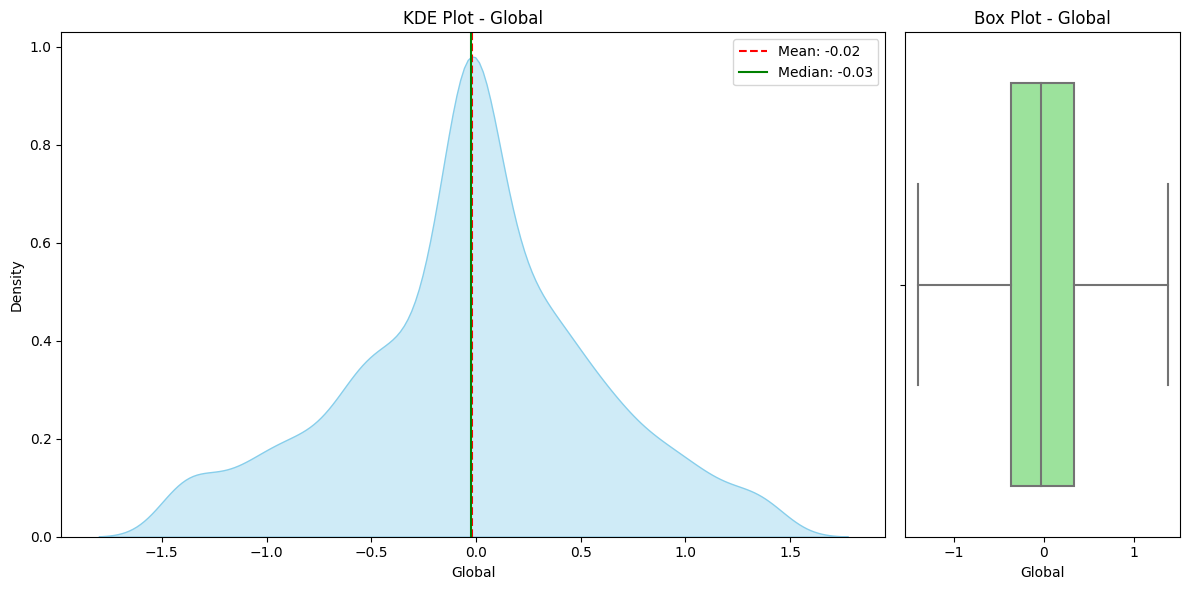

Mean of Global: -0.02
Median of Global: -0.03


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


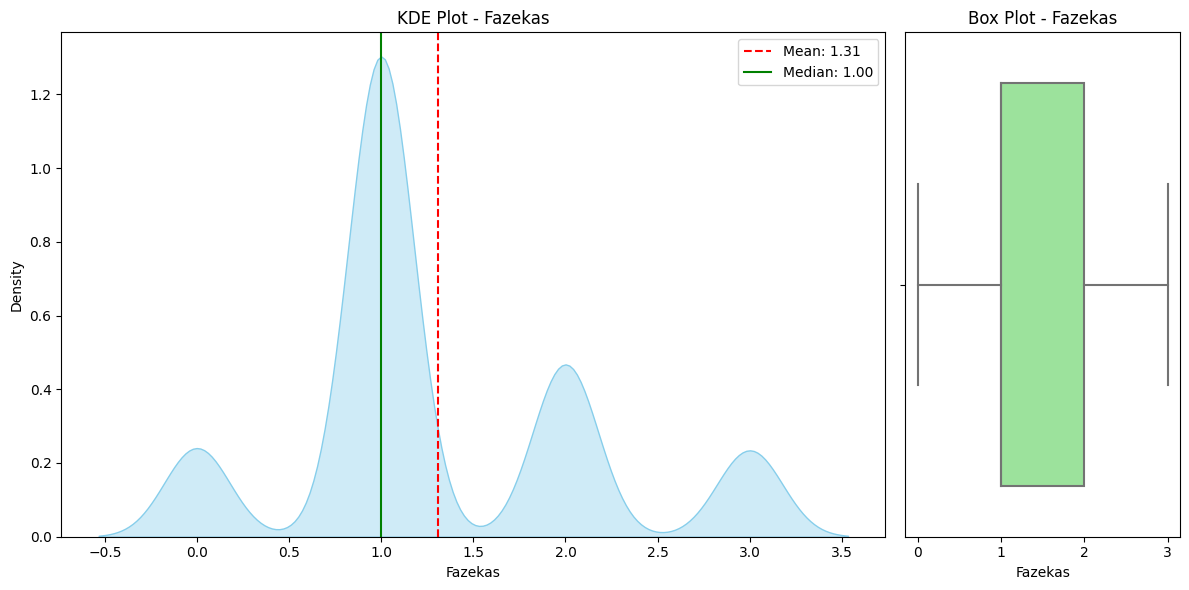

Mean of Fazekas: 1.31
Median of Fazekas: 1.00


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


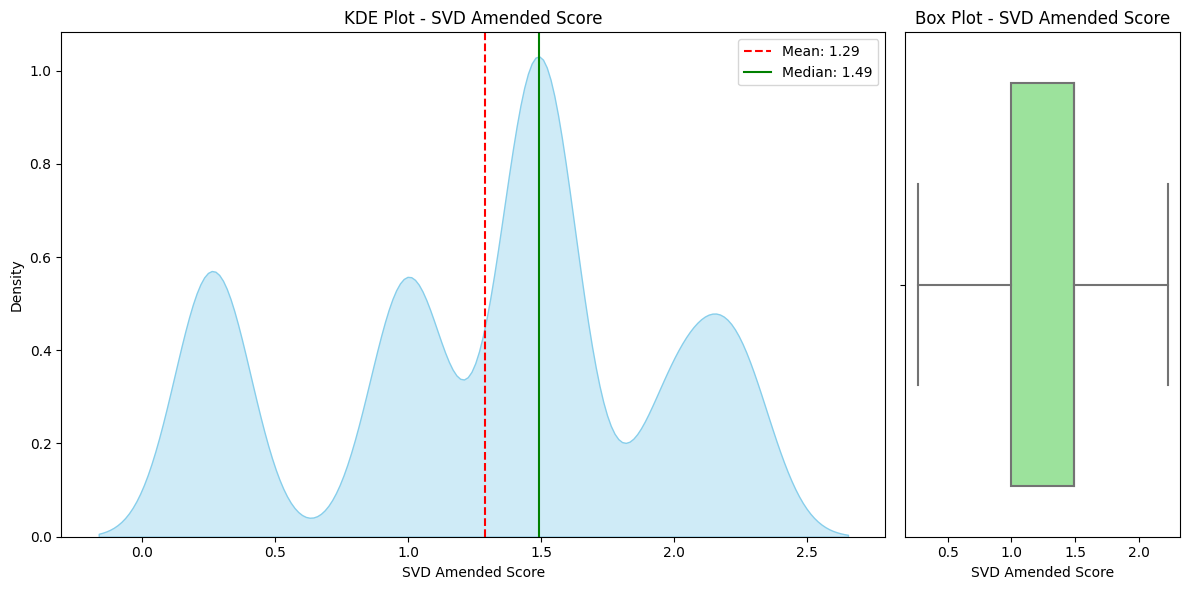

Mean of SVD Amended Score: 1.29
Median of SVD Amended Score: 1.49


In [65]:
for numerical in num_cols:
    show_kde_and_box_plot(dataset,numerical,'a')
    

## Explorarity Data Analysis


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

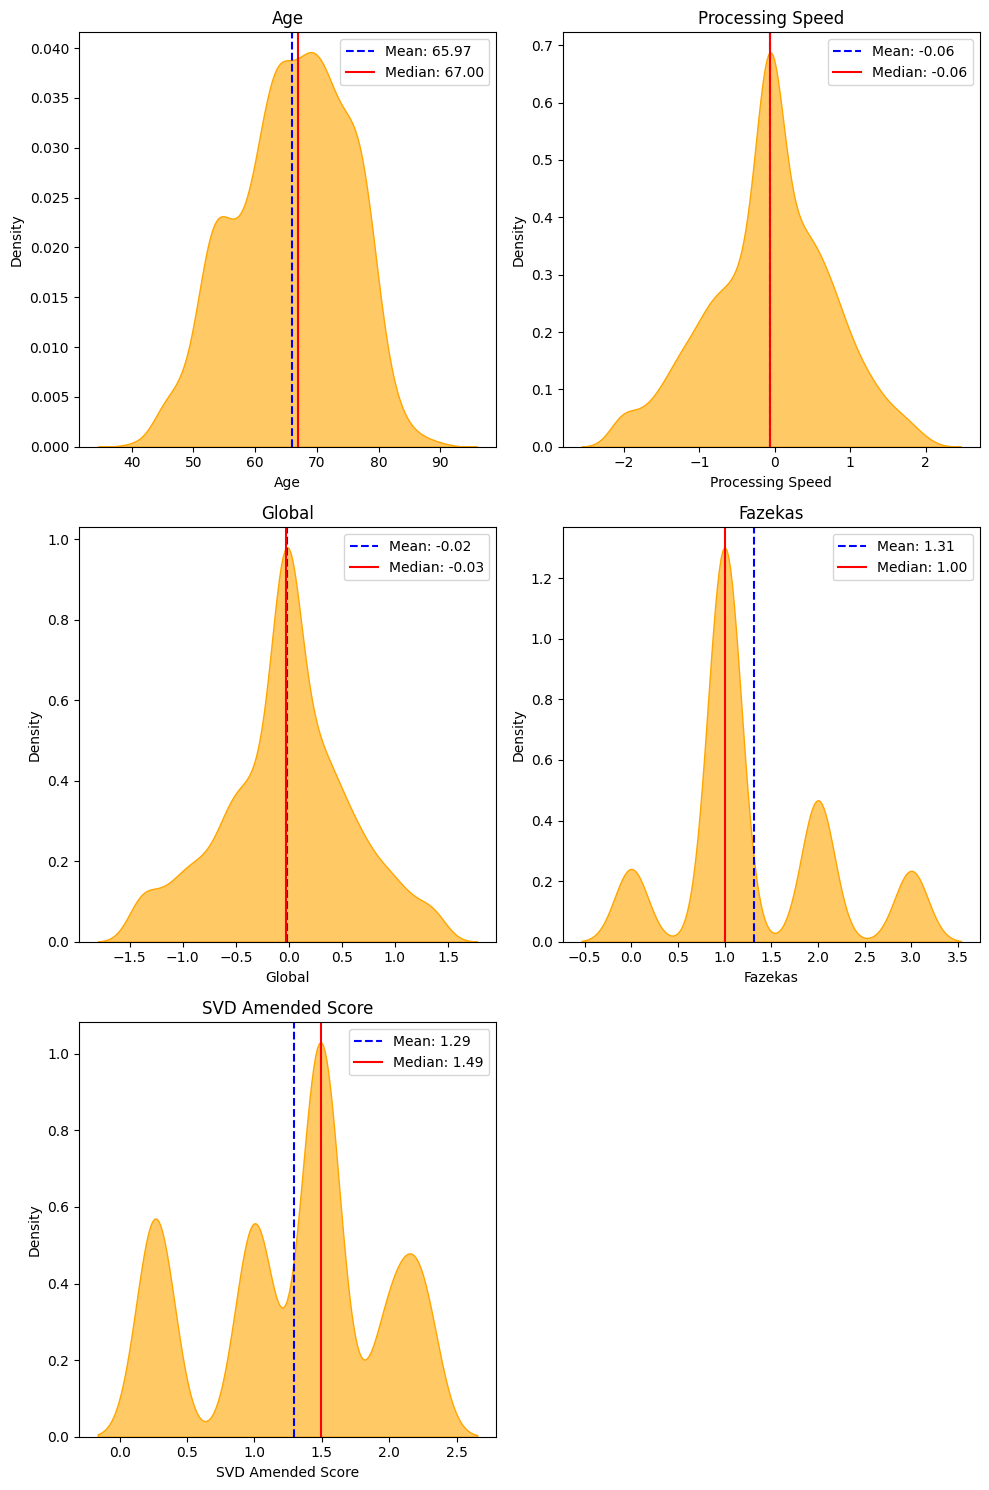

In [66]:
fig = show_kde_plot(dataset,num_cols)
fig.savefig("kde_plot_after_curation.png")
plt.show()

In [67]:
'''
dataset.to_csv('clean_brain_dataset.csv', index=False)
'''

"\ndataset.to_csv('clean_brain_dataset.csv', index=False)\n"

In [68]:
corr = dataset[num_cols].corr()
corr

,Age,Processing Speed,Global,Fazekas,SVD Amended Score
Age,1.000000,-0.503729,-0.480288,0.376847,0.339352
Processing Speed,-0.503729,1.000000,0.803434,-0.299912,-0.313603
Global,-0.480288,0.803434,1.000000,-0.271051,-0.283393
Fazekas,0.376847,-0.299912,-0.271051,1.000000,0.544619
SVD Amended Score,0.339352,-0.313603,-0.283393,0.544619,1.000000


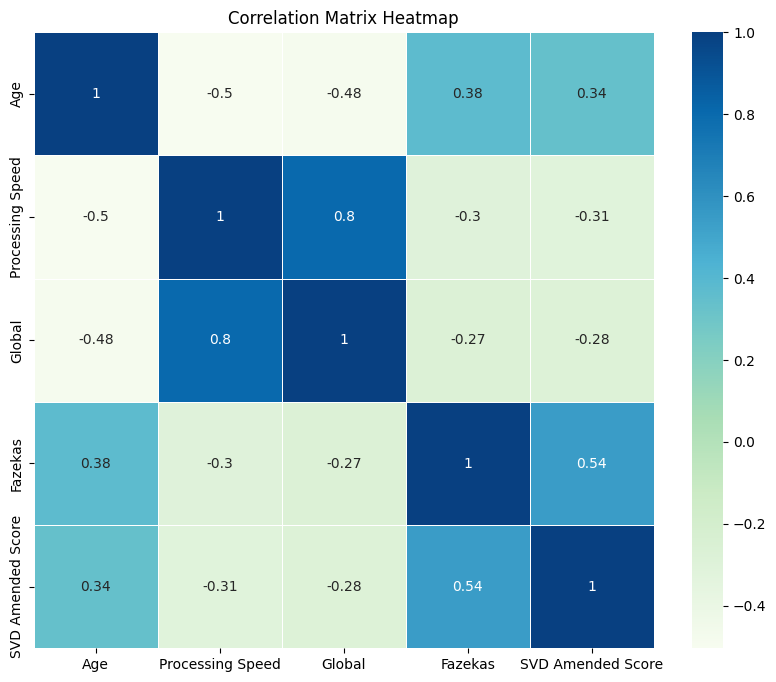

In [69]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='GnBu', linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.savefig("correlation.png")
plt.show()

<ipython-input-70-789652d1d049>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=dataset, x='Age', y='Global', palette = 'OrRd')


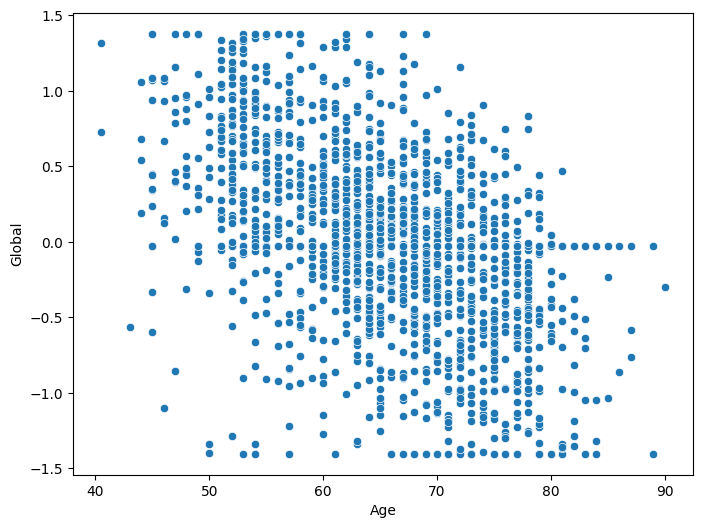

In [70]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Global', palette = 'OrRd')

# Save the figure
plt.savefig("age_global.png")

# Show the plot
plt.show()

In [71]:
cate_cols

['Gender',
 'Dementia',
 'Diabetes',
 'Hypertension',
 'Hypercholesterolemia',
 'Smoking',
 'Lacunes Presence',
 'CMB Presence',
 'Fazekas Category',
 'Lacunes PresenceSVD Score Label']

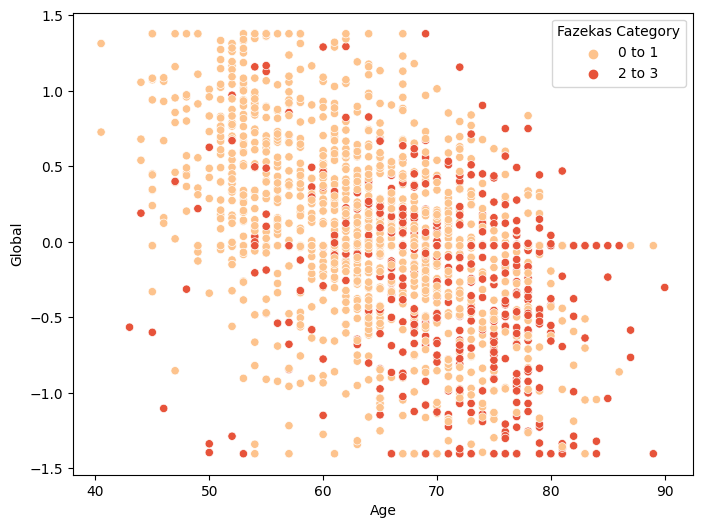

In [72]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Global', hue='Fazekas Category', palette = 'OrRd')

# Save the figure
plt.savefig("age_globa_fazekas.png")

# Show the plot
plt.show()

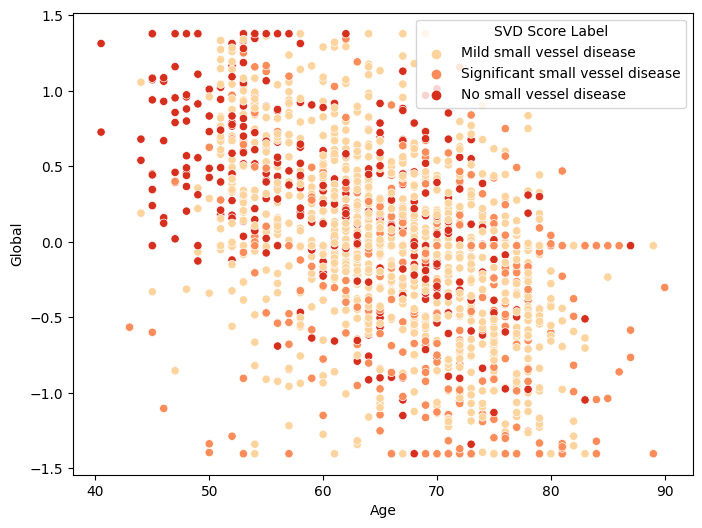

In [73]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Global', hue='SVD Score Label', palette = 'OrRd')

# Save the figure
plt.savefig("age_globa_SVD.png")

# Show the plot
plt.show()

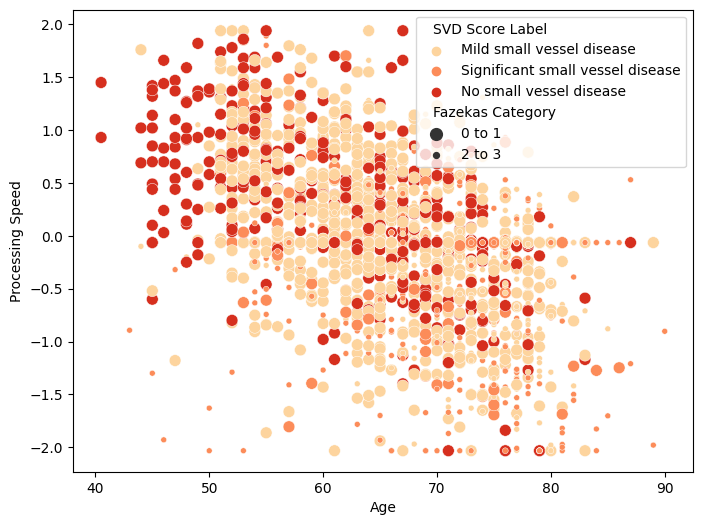

In [74]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed', size='Fazekas Category',hue='SVD Score Label' ,palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_fazekas_svd.png")

# Show the plot
plt.show()

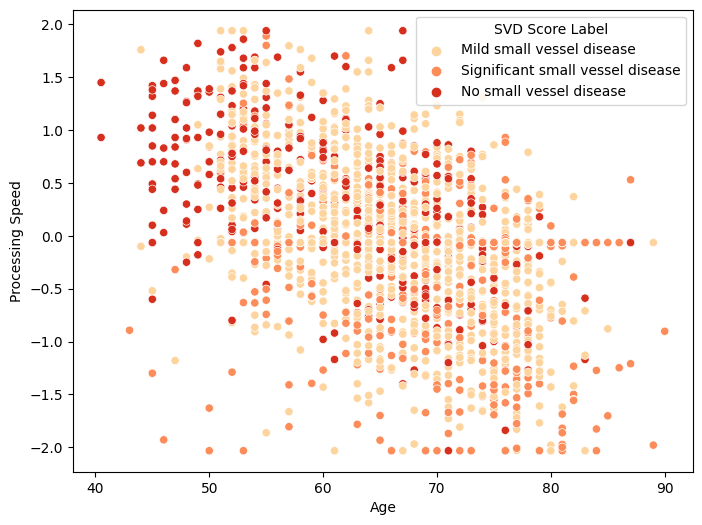

In [75]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed', hue='SVD Score Label', palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_SVD.png")

# Show the plot
plt.show()

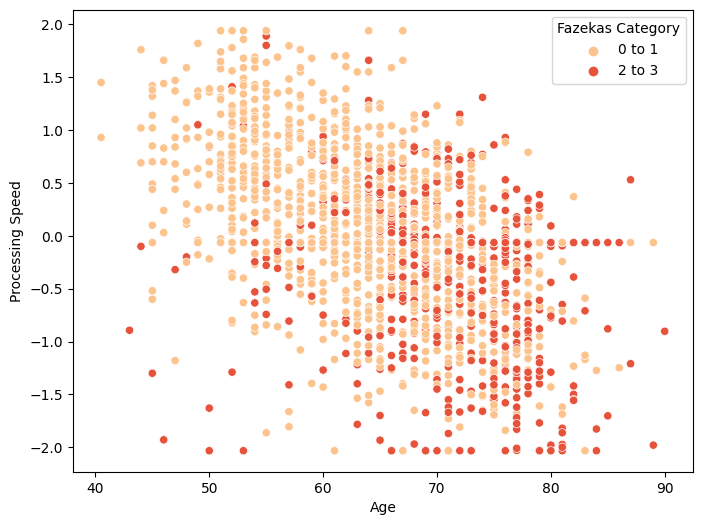

In [76]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed', hue='Fazekas Category' ,palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_fazekas.png")

# Show the plot
plt.show()

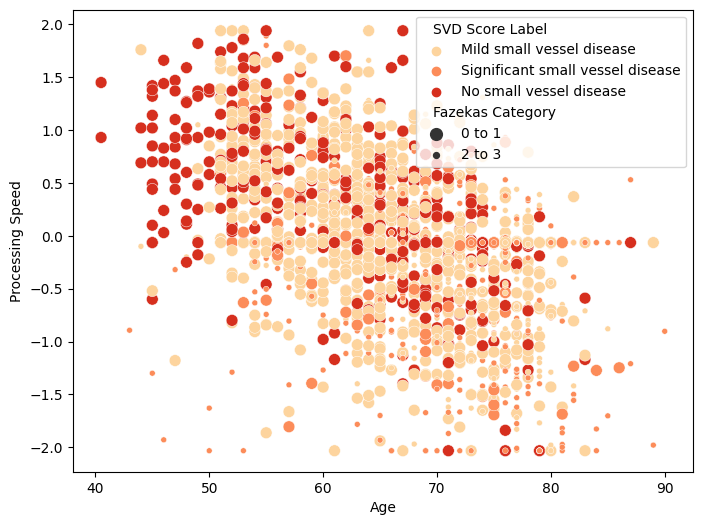

In [77]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed', size='Fazekas Category',hue='SVD Score Label' ,palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_fazekas_svd.png")

# Show the plot
plt.show()

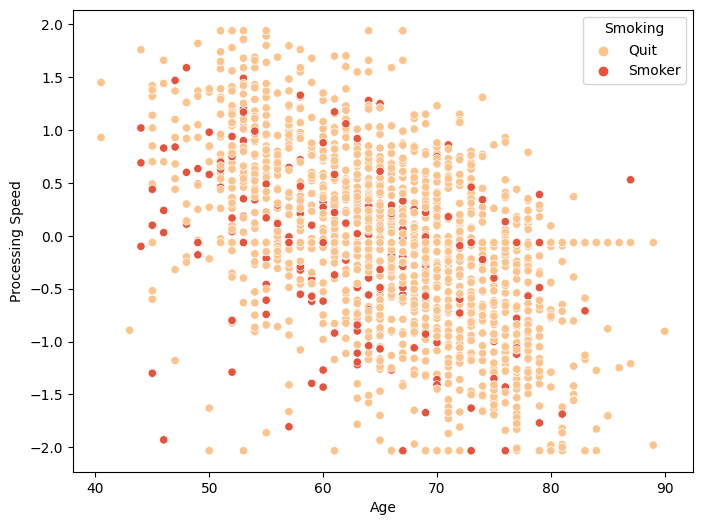

In [78]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed',hue='Smoking' ,palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_fazekas_svd.png")

# Show the plot
plt.show()

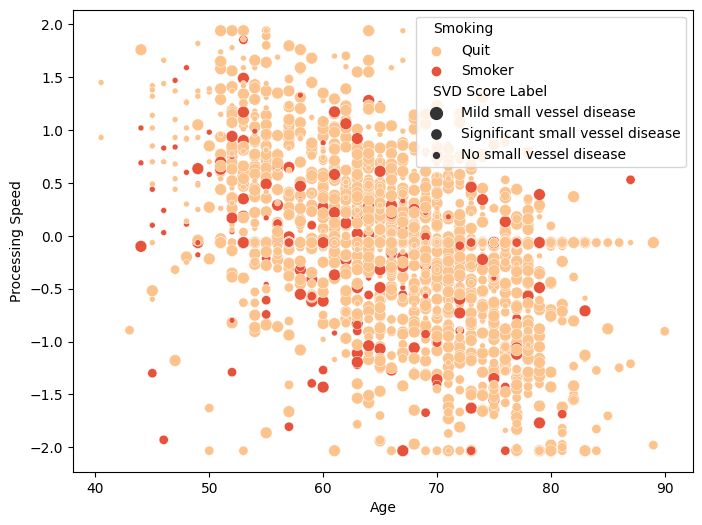

In [79]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed',hue='Smoking',size="SVD Score Label" ,palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_fazekas_svd.png")

# Show the plot
plt.show()

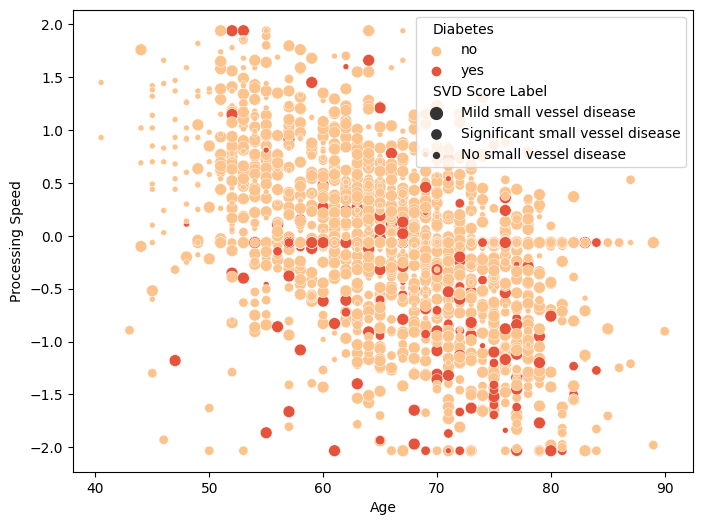

In [80]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed',hue='Diabetes',size="SVD Score Label" ,palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_diabetes.png")

# Show the plot
plt.show()

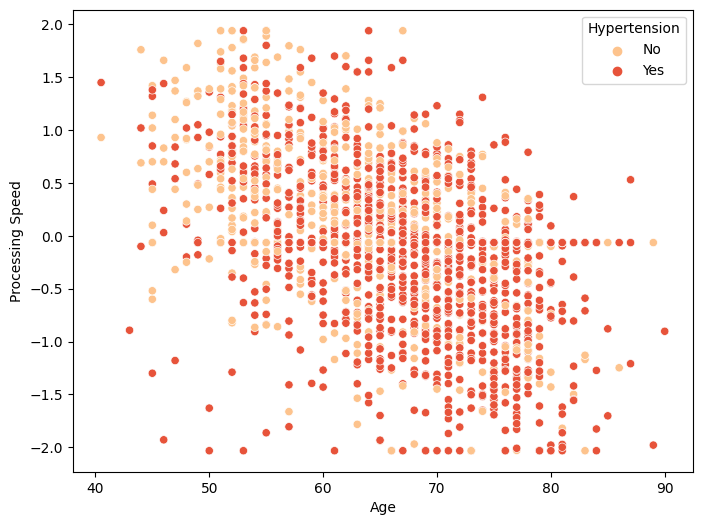

In [81]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed',hue='Hypertension' ,palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_fazekas_svd.png")

# Show the plot
plt.show()

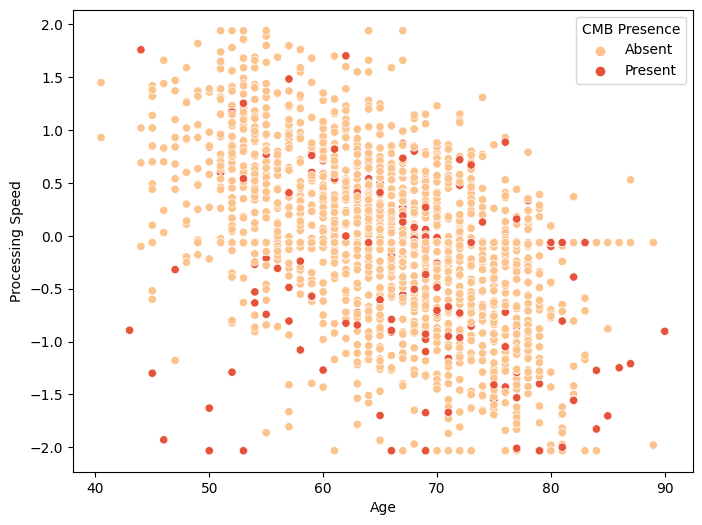

In [82]:
plt.figure(figsize=(8, 6))  # Optionally set the figure size
sns.scatterplot(data=dataset, x='Age', y='Processing Speed',hue='CMB Presence' ,palette = 'OrRd')

# Save the figure
plt.savefig("age_ps_fazekas_svd.png")

# Show the plot
plt.show()

In [83]:
dataset.columns

Index(['Age', 'Gender', 'Dementia', 'Diabetes', 'Hypertension',
       'Hypercholesterolemia', 'Smoking', 'Processing Speed', 'Global',
       'Lacunes Presence', 'CMB Presence', 'Fazekas', 'Fazekas Category',
       'SVD Amended Score', 'Lacunes Count', 'SVD Score Label'],
      dtype='object')